![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad2024-12-prediccion-precio-vehiculos).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import joblib

In [4]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [6]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [7]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [8]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


# Análisis Exploratorio Descriptivo

In [9]:
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [10]:
# Principales estadisticos del training
round(dataTraining.describe(),0)

,Price,Year,Mileage
count,400000.0,400000.0,400000.0
mean,21147.0,2013.0,55073.0
std,10754.0,3.0,40881.0
min,5001.0,1997.0,5.0
25%,13499.0,2012.0,25841.0
50%,18450.0,2014.0,42955.0
75%,26999.0,2016.0,77433.0
max,79999.0,2018.0,2457832.0


<Axes: xlabel='Price', ylabel='Year'>

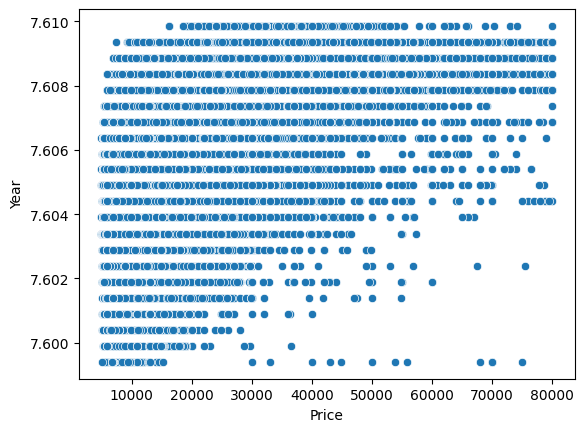

In [11]:
# Gráfica price vs year
sn.scatterplot(x=dataTraining['Price'], y = np.log(dataTraining['Year']))

## Explorar la posibilidad de hacer una transformación logaritmica a la variable Price

<Axes: xlabel='Price', ylabel='Mileage'>

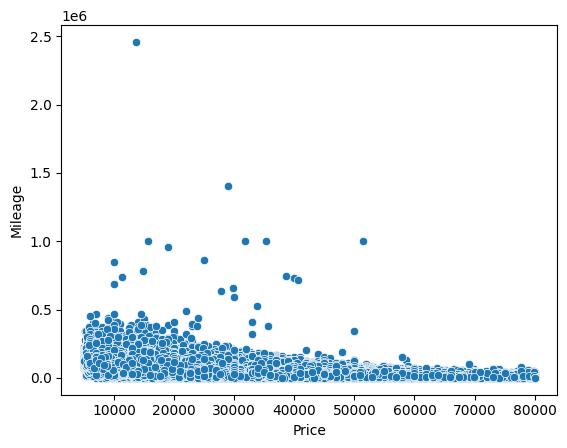

In [12]:
# Gráfica price vs mileage
sn.scatterplot(x=dataTraining['Price'], y = dataTraining['Mileage'])

<Axes: xlabel='Price', ylabel='Mileage'>

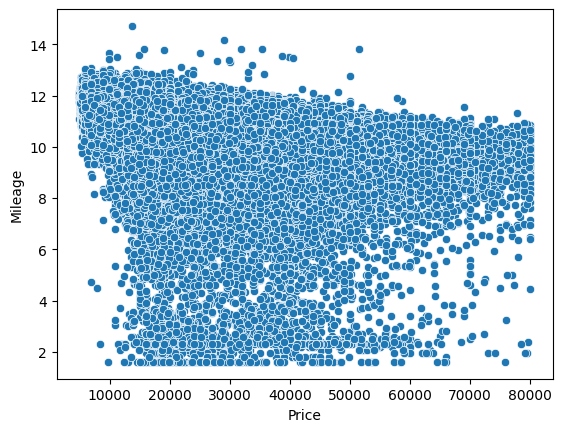

In [13]:
# Gráfica price vs mileage
sn.scatterplot(x=dataTraining['Price'], y = np.log(dataTraining['Mileage']))

## Explorar la posibilidad de hacer una transformación logaritmica a la variable Mileage

<Axes: xlabel='Price', ylabel='Mileage'>

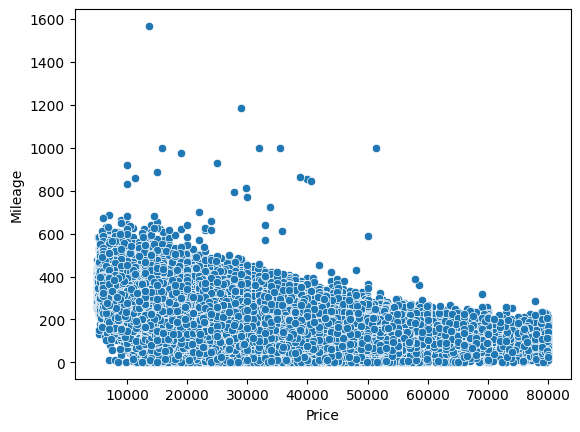

In [14]:
# Gráfica price vs ,mileage
sn.scatterplot(x=dataTraining['Price'], y = np.power(dataTraining['Mileage'], 1/2))

<Axes: xlabel='Price', ylabel='Mileage'>

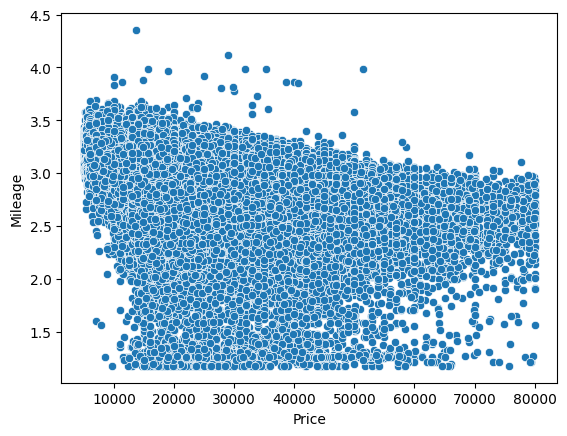

In [15]:
# Gráfica price vs ,mileage
sn.scatterplot(x=dataTraining['Price'], y = np.power(dataTraining['Mileage'], 1/10))

In [16]:
# # Prueba de normalidad

# from scipy.stats import shapiro

# # Test de Shapiro Price
# statistic, p_value = shapiro(dataTraining['Year'])

# # Determinar al aceptación o rechazo de la HO
# print('Price')
# if p_value > 0.05:
#     print('No se encuentra suficiente evidencia estadística para rechazar la hipotesis nula, por lo cual se concluye que los datos Year siguen una distribución normal')
# else:
#     print('Se encuentra suficiente evidencia estadística para rechazar la hipotesis nula, por lo cual se concluye que los datos Year NO siguen una distribución normal')

# # Test de Shapiro Mileage
# statistic, p_value = shapiro(dataTraining['Mileage'])

# # Determinar al aceptación o rechazo de la HO
# print('Mileage')
# if p_value > 0.05:
#     print('No se encuentra suficiente evidencia estadística para rechazar la hipotesis nula, por lo cual se concluye que los datos Mileage siguen una distribución normal')
# else:
#     print('Se encuentra suficiente evidencia estadística para rechazar la hipotesis nula, por lo cual se concluye que los datos Mileage NO siguen una distribución normal')


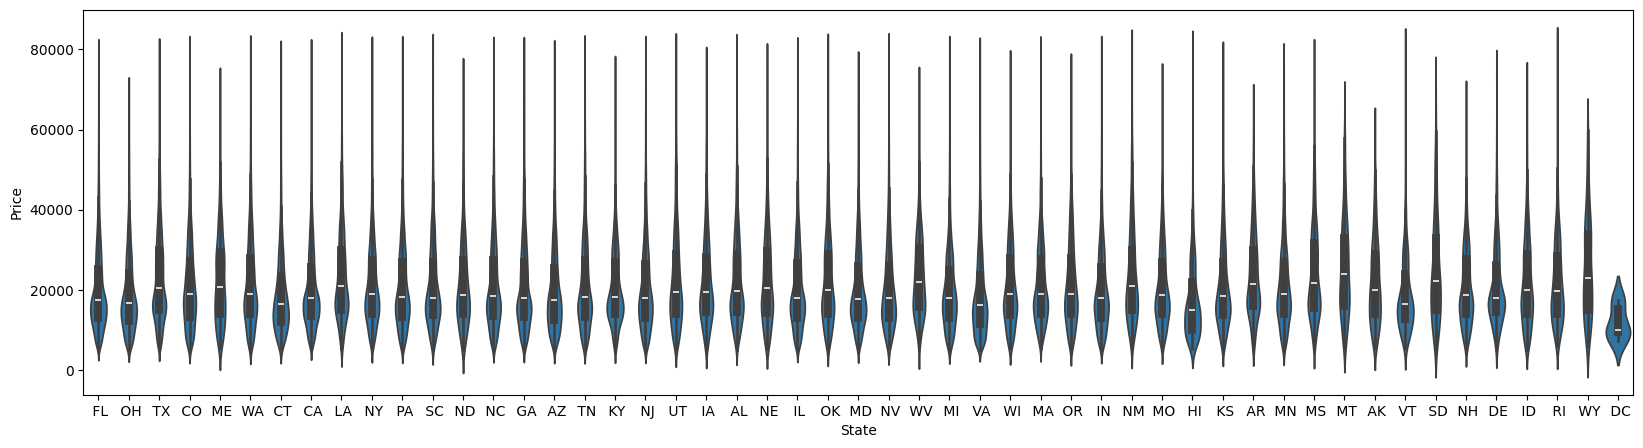

In [16]:
plt.figure(figsize=(20, 5))
sn.violinplot(x=dataTraining['State'], y=dataTraining['Price'])
plt.show()

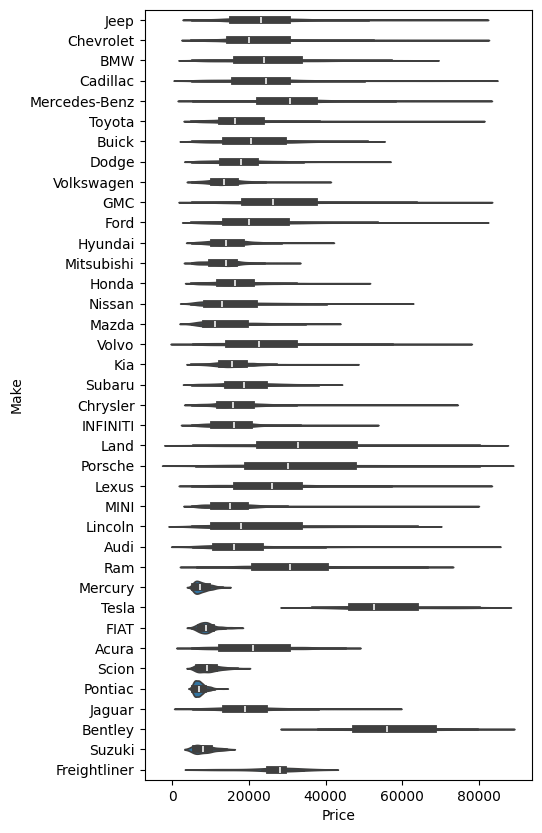

In [27]:
plt.figure(figsize=(5, 10))
sn.violinplot(y=dataTraining['Make'], x=dataTraining['Price'])
plt.show()

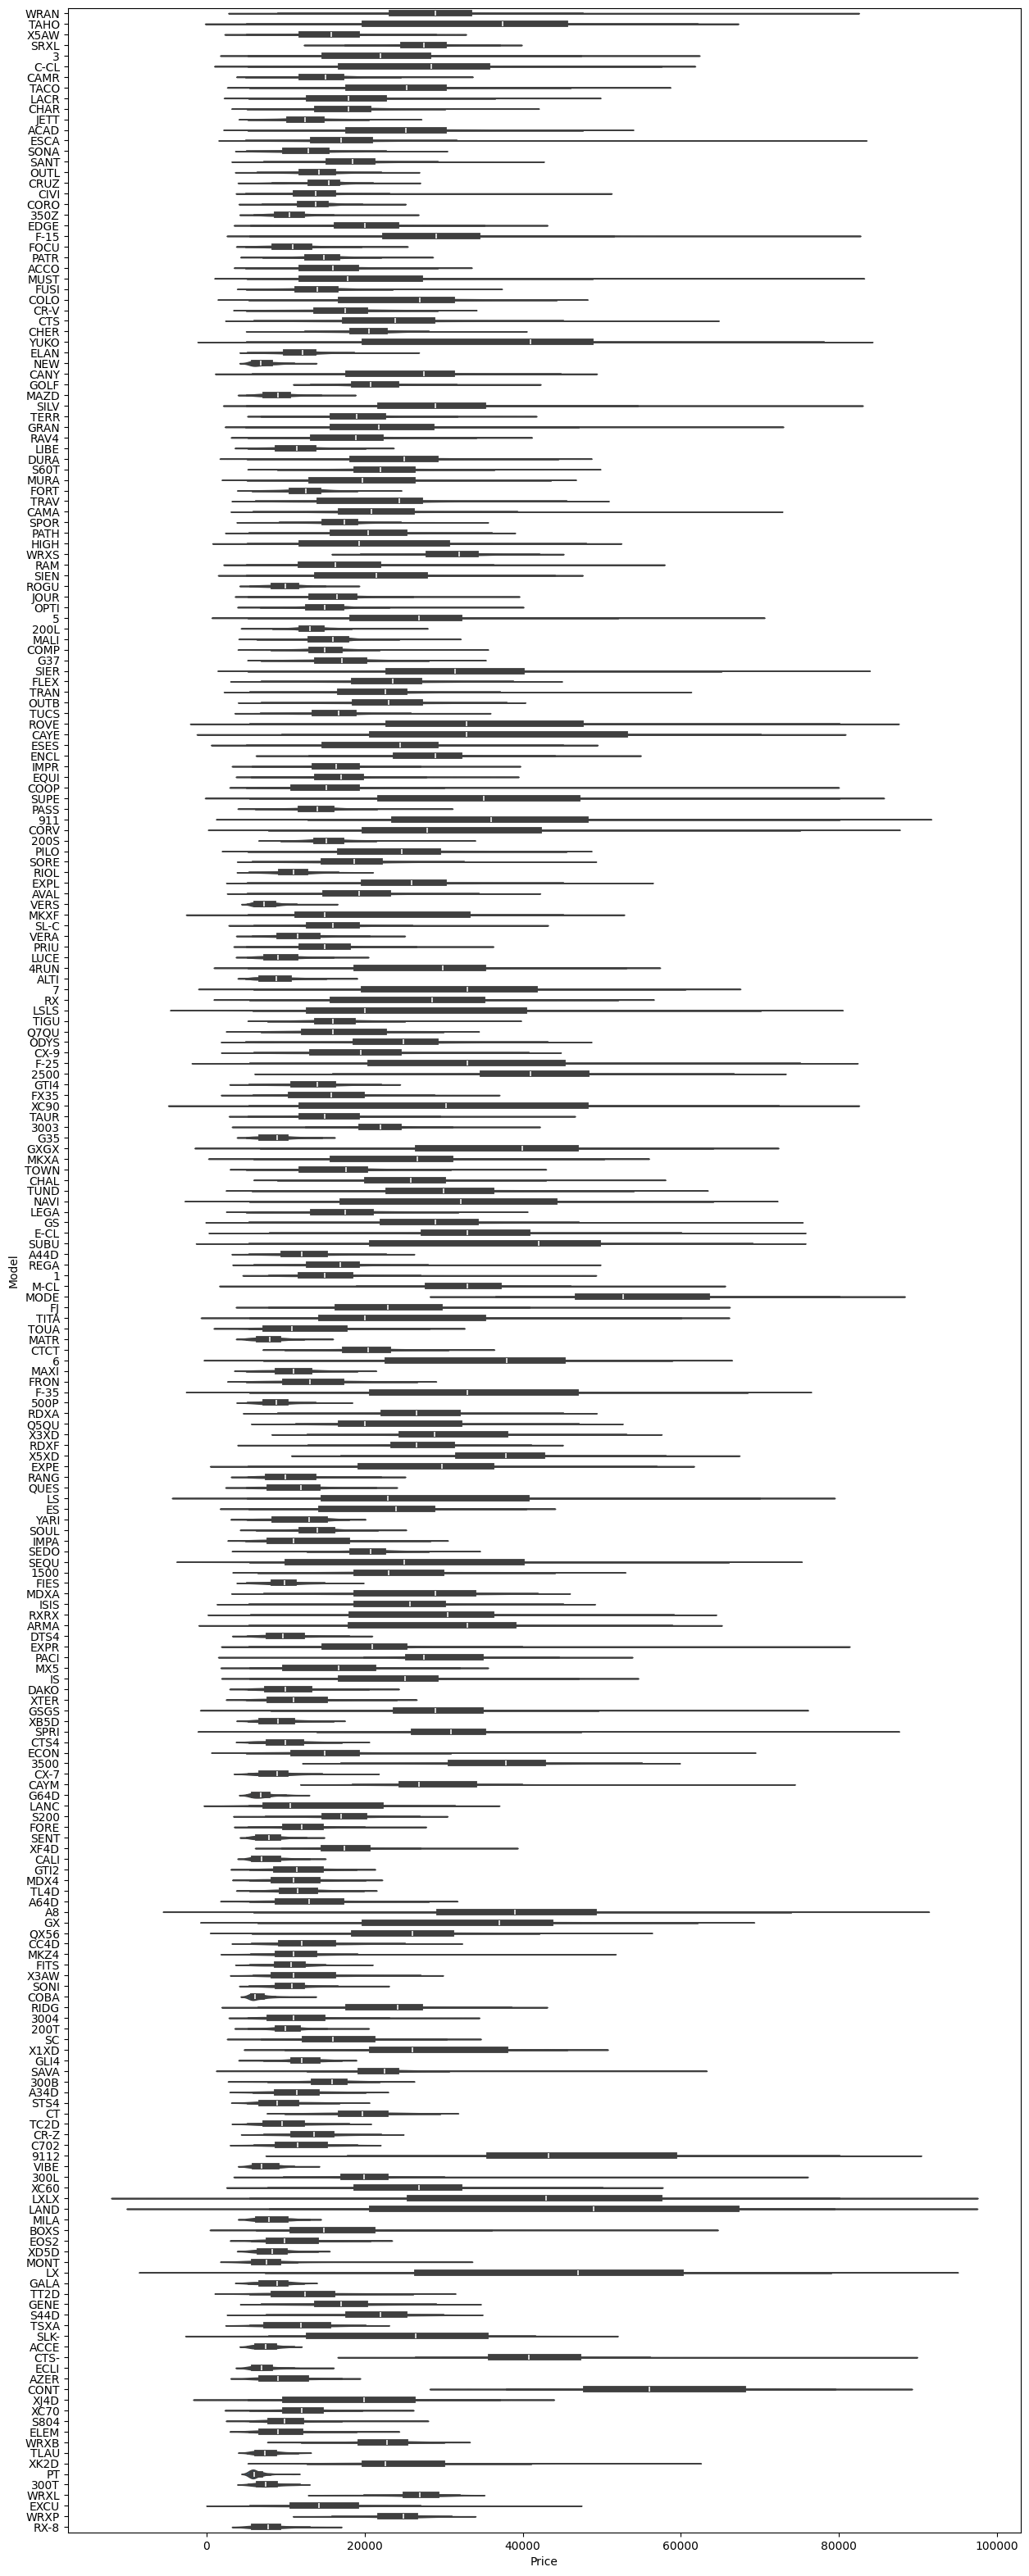

In [24]:
plt.figure(figsize=(15, 40))
sn.violinplot(y=dataTraining['Model'].str[:4].str.upper(), x=dataTraining['Price'])
plt.show()

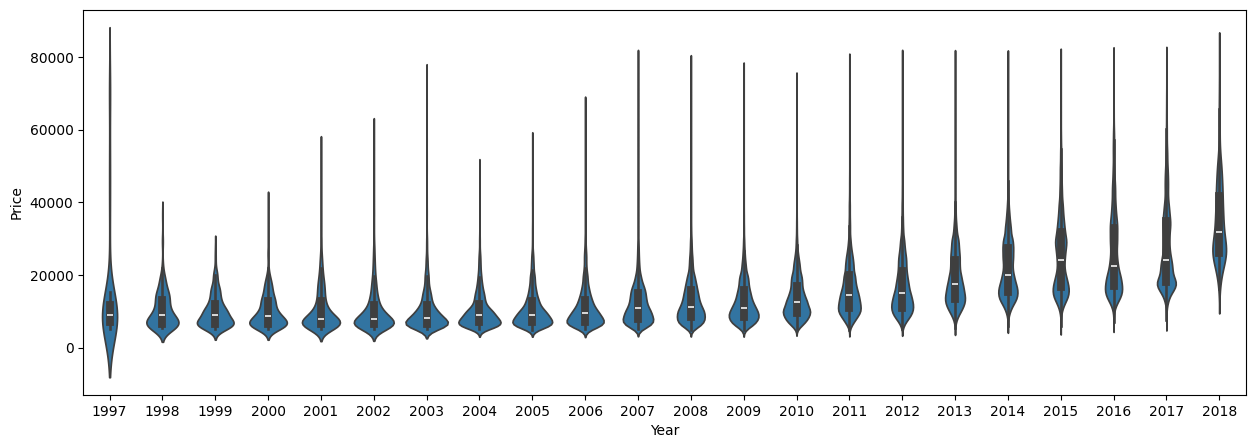

In [20]:
plt.figure(figsize=(15, 5))
sn.violinplot(x=dataTraining['Year'], y=dataTraining['Price'])
plt.show()

<Axes: ylabel='Price'>

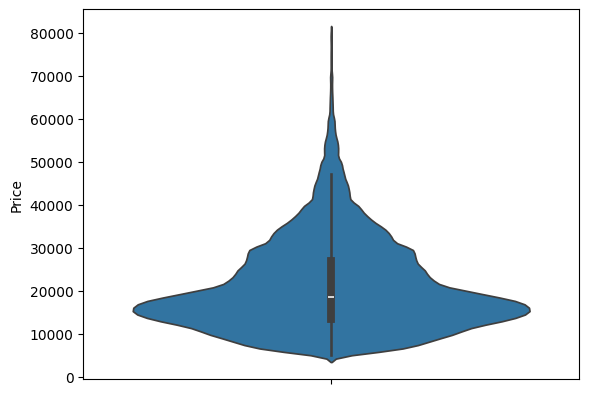

In [21]:
sn.violinplot(dataTraining['Price'])

<Axes: ylabel='Mileage'>

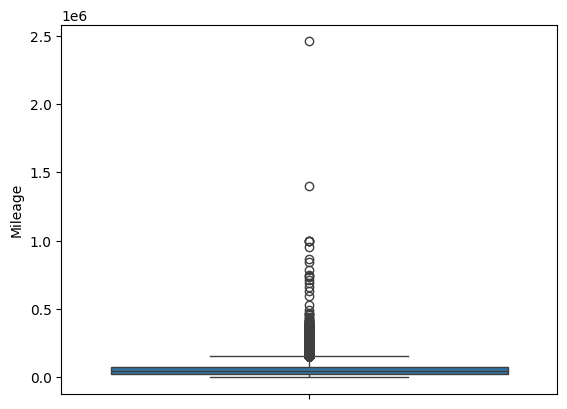

In [22]:
sn.boxplot(dataTraining['Mileage'])

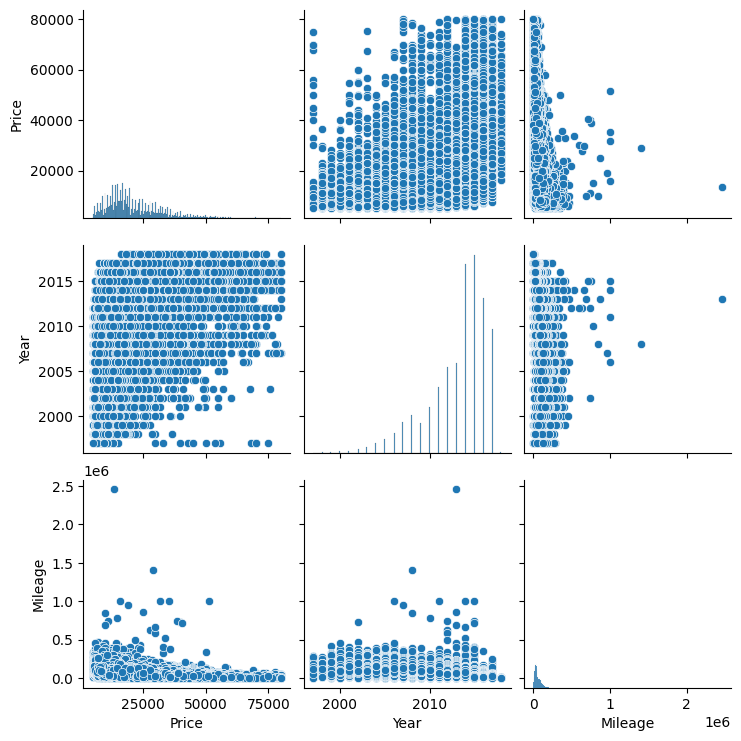

In [23]:
sn.pairplot(dataTraining)

<Axes: >

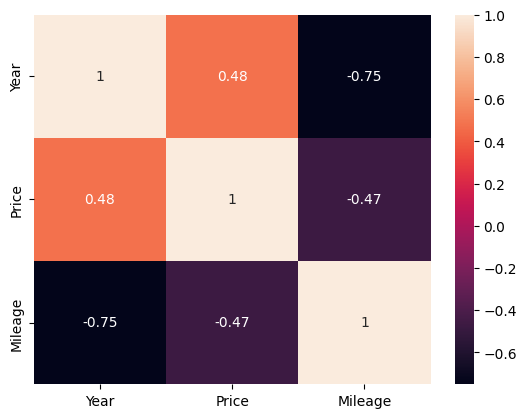

In [24]:
sn.heatmap(dataTraining[['Year','Price','Mileage']].corr(), annot= True)

### Preprocesamiento de los datos

In [ ]:
dataTraining['Make'].unique()

In [50]:
dataTraining['Model'].unique()

array(['Wrangler', 'Tahoe4WD', 'X5AWD', 'SRXLuxury', '3', 'C-ClassC300',
       'CamryL', 'TacomaPreRunner', 'LaCrosse4dr', 'ChargerSXT',
       'CamryLE', 'Jetta', 'AcadiaFWD', 'EscapeSE', 'SonataLimited',
       'Santa', 'Outlander', 'CruzeSedan', 'Civic', 'CorollaL', '350Z2dr',
       'EdgeSEL', 'F-1502WD', 'FocusSE', 'PatriotSport', 'Accord',
       'MustangGT', 'FusionHybrid', 'ColoradoCrew', 'Wrangler4WD',
       'CR-VEX-L', 'CTS', 'CherokeeLimited', 'Yukon', 'Elantra', 'New',
       'CorollaLE', 'Canyon4WD', 'Golf', 'Sonata4dr', 'Elantra4dr',
       'PatriotLatitude', 'Mazda35dr', 'Tacoma2WD', 'Corolla4dr',
       'Silverado', 'TerrainFWD', 'EscapeFWD', 'Grand', 'RAV4FWD',
       'Liberty4WD', 'FocusTitanium', 'DurangoAWD', 'S60T5', 'CivicLX',
       'MuranoAWD', 'ForteEX', 'TraverseAWD', 'CamaroConvertible',
       'Sportage2WD', 'Pathfinder4WD', 'Highlander4dr', 'WRXSTI', 'Ram',
       'F-150XLT', 'SiennaXLE', 'LaCrosseFWD', 'RogueFWD', 'CamaroCoupe',
       'JourneySXT', 'Acc

In [49]:
len(dataTraining['Model'].str.upper().unique())

524

In [ ]:
dataTraining['Model'].str.upper().unique()

# Prueba 1: Pre-procesamiento en los datos

In [ ]:
# Realizar One-hot encoding a las variales string con el fin de que se conviertan en numéricas

### Set de Training
make_encoding_train = pd.get_dummies(dataTraining['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0})
model_encoding_train = pd.get_dummies(dataTraining['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0})
state_encoding_train = pd.get_dummies(dataTraining['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})

### Set de Testing
make_encoding_test = pd.get_dummies(dataTesting['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0})
model_encoding_test = pd.get_dummies(dataTesting['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0})
state_encoding_test = pd.get_dummies(dataTesting['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})

### Ajustar las bases originales

df_train = pd.concat([dataTraining.drop(columns = 'Make'), make_encoding_train], axis = 1)
df_train = pd.concat([df_train.drop(columns = 'Model'), model_encoding_train], axis = 1)
df_train = pd.concat([df_train.drop(columns = 'State'), state_encoding_train], axis = 1)

df_test = pd.concat([dataTesting.drop(columns = 'Make'), make_encoding_test], axis = 1)
df_test = pd.concat([df_test.drop(columns = 'Model'), model_encoding_test], axis = 1)
df_test = pd.concat([df_test.drop(columns = 'State'), state_encoding_test], axis = 1)

df_train.head()

In [ ]:
# Revisar las estadísticas descriptivas de las variables numéricas: Price, Mileage y Year

df_train[['Price', 'Mileage', 'Year']].describe()

In [ ]:
# Estandarizar la variable Mileage en los sets de entrenamiento y testeo

from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler(with_mean = True)

# Escalonar los valores de la variable Mileage en los sets de entrenamiento y testeo
mileage_scaler_train = scaler.fit_transform(df_train[['Mileage']])
mileage_scaler_test = scaler.transform(df_test[['Mileage']])

# Ajustar el vector escalonado a columna de pandas
mileage_train = pd.DataFrame(mileage_scaler_train).rename(columns = {0:'Mileage'})
mileage_test = pd.DataFrame(mileage_scaler_test).rename(columns = {0:'Mileage'})

# Reemplazar la columna Mileage por la Mileage escalonada 

df_train = pd.concat([df_train.drop(columns='Mileage'), mileage_train], axis = 1)
df_test = pd.concat([df_test.drop(columns='Mileage'), mileage_test], axis = 1)

df_train.head()

#### Primera modelo: Random Forest

In [ ]:
# Partir la base de Training en training y test

X = df_train.drop(columns = 'Price')
y = df_train['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import math

# Inicialización del modelo de ensamblaje de RandomForestRegressor usando k-folds cross-validation con k = 
randomforest = RandomForestRegressor(n_estimators = 15, random_state = 1, n_jobs = -1)
# print('RMSE', cross_val_score(randomforest, X, y, cv = 5, scoring = 'neg_root_mean_squared_error').mean())
randomforest = randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

print('MSE:', np.square(mean_squared_error(y_test, y_pred)))

# Prueba 2: Pre-procesamiento de datos

In [5]:
# Ajustar el nombre de los modelos con el fin de reducir la cantidad de categórias en dicho campo

# Crear copia de los dataframes originales
df_train = dataTraining.copy()
df_test = dataTesting.copy()

# Ajustar la variable Model
df_train['Model'] = df_train['Model'].str[:4].str.upper()
df_test['Model'] = df_test['Model'].str[:4].str.upper()

df_train.shape

(400000, 6)

In [32]:
pd.get_dummies(df_train['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0})

,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_Ford,...,Make_Pontiac,Make_Porsche,Make_Ram,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
pd.get_dummies(df_train['Model'], drop_first = True, prefix = 'Model').replace({True:1, False:0})

,Model_1500,Model_200L,Model_200S,Model_200T,Model_2500,Model_3,Model_3003,Model_3004,Model_300B,Model_300L,...,Model_XC60,Model_XC70,Model_XC90,Model_XD5D,Model_XF4D,Model_XJ4D,Model_XK2D,Model_XTER,Model_YARI,Model_YUKO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
pd.get_dummies(df_train['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})

,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,State_ FL,State_ GA,...,State_ SD,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
399996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Realizar One-hot encoding a las variables string con el fin de que se conviertan en numéricas

# ### Set de Training
# make_encoding_train = pd.get_dummies(df_train['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0})
# model_encoding_train = pd.get_dummies(df_train['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0})
# state_encoding_train = pd.get_dummies(df_train['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})

# ### Set de Testing
# make_encoding_test = pd.get_dummies(df_test['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0})
# model_encoding_test = pd.get_dummies(df_test['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0})
# state_encoding_test = pd.get_dummies(df_test['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})

### Ajustar las bases originales

df_train = pd.concat([df_train.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_train['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_train['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_train['State'].str.strip(), drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)
df_test = pd.concat([df_test.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_test['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_test['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_test['State'].str.strip(), drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)

df_train.head()

,Price,Year,Mileage,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,34995,2017,9913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,2015,20578,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,2012,83716,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24681,2014,28729,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,2013,64032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Revisar las estadísticas descriptivas de las variables numéricas: Price, Mileage y Year

df_train[['Price', 'Mileage', 'Year']].describe()

,Price,Mileage,Year
count,400000.000000,4.000000e+05,400000.000000
mean,21146.919312,5.507296e+04,2013.198125
std,10753.664940,4.088102e+04,3.292326
min,5001.000000,5.000000e+00,1997.000000
25%,13499.000000,2.584100e+04,2012.000000
50%,18450.000000,4.295500e+04,2014.000000
75%,26999.000000,7.743300e+04,2016.000000
max,79999.000000,2.457832e+06,2018.000000


In [ ]:
# Modelo resultante - Primer Modelo Seleccionado

X2 = X1.drop(columns = 'Make_Freightliner')
XGBRegressor1 = XGBRegressor(learning_rate = 0.66, random_state = 1, n_jobs = -1)
XGBRegressor1 = XGBRegressor1.fit(X2, y1)
prediccion = XGBRegressor1.predict(df_test)

In [55]:
# Estandarizar la variable Mileage en los sets de entrenamiento y testeo

from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler(with_mean = True)

# Escalonar los valores de la variable Mileage en los sets de entrenamiento y testeo
mileage_scaler_train = scaler.fit_transform(df_train[['Mileage']])
mileage_scaler_test = scaler.transform(df_test[['Mileage']])

# Ajustar el vector escalonado a columna de pandas
mileage_train = pd.DataFrame(mileage_scaler_train).rename(columns = {0:'Mileage'})
mileage_test = pd.DataFrame(mileage_scaler_test).rename(columns = {0:'Mileage'})

# Reemplazar la columna Mileage por la Mileage escalonada 

df_train = pd.concat([df_train.drop(columns='Mileage'), mileage_train], axis = 1)
df_test = pd.concat([df_test.drop(columns='Mileage'), mileage_test], axis = 1)

df_train.head()

,Price,Year,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Mileage
0,34995,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.104669
1,37895,2015,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.843790
2,18430,2012,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.700645
3,24681,2014,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.644406
4,26998,2013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.219149


#### Primer modelo: Random Forest

In [16]:
# Partir la base de Training en training y test

X1 = df_train.drop(columns = 'Price')
y1 = df_train['Price']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
X_train1.shape

(268000, 326)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import math

# Inicialización del modelo de ensamblaje de RandomForestRegressor usando k-folds cross-validation con k = 
randomforest = RandomForestRegressor(n_estimators = 40, random_state = 1, n_jobs = -1)
randomforest = randomforest.fit(X_train1, y_train1)
y_pred = randomforest.predict(X_test1)

print('RMSE:', np.sqrt(mean_squared_error(y_test1, y_pred)))

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt
# import numpy as np
# import math

# raisemse_range = []
# # Inicialización del modelo de ensamblaje de RandomForestRegressor usando k-folds cross-validation con k = 
# for parameter in range(5,100,10):
#     randomforest = RandomForestRegressor(n_estimators = parameter, random_state = 1, n_jobs = -1)
#     randomforest = randomforest.fit(X_train1, y_train1)
#     y_pred = randomforest.predict(X_test1)

#     rmse_range.append(np.sqrt(mean_squared_error(y_test1, y_pred)))

rmse_range

In [ ]:
rmse_range

#### Segundo modelo: XGBoost

In [17]:
# Entrenar primer modelo de XGBoost

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Inicialización del modelo de XDBRegressor

XGBRegressor1 = XGBRegressor()

# Entrenar el modelo
XGBRegressor1.fit(X_train1, y_train1)

# Predecir los valores de la variable de respuesta
y_pred = XGBRegressor1.predict(X_test1)

# Calcular el error de la predicción RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test1, y_pred)))


RMSE:  3938.272129446232


Text(0.5, 0, 'RMSE')

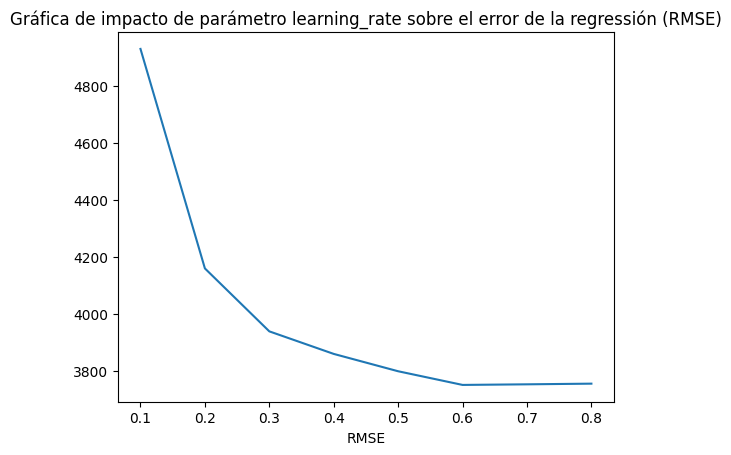

In [46]:
# Lista de valores del parámetro learning_rate_range a probar
learning_rate_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
rmse_scores = []

# Inicialización del modelo de ensamblaje de XGBRegressor usando k-folds cross-validation con k = 10
for parameter in learning_rate_range:
    randomforest2 = XGBRegressor(learning_rate = parameter, random_state = 1, n_jobs = -1)
    randomforest2 = randomforest2.fit(X_train1, y_train1)
    y_pred = randomforest2.predict(X_test1)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test1, y_pred)))

# Graficar impacto de la variable learning_rate con la métrica de RMSE
plt.plot(learning_rate_range, rmse_scores)
plt.title('Gráfica de impacto de parámetro learning_rate sobre el error de la regressión (RMSE)')
plt.xlabel('learning_rate')
plt.xlabel('RMSE')

In [47]:
print(rmse_scores)

[4930.455129739261, 4159.377473563768, 3938.272129446232, 3859.073324476723, 3798.135940464789, 3750.128595930123, 3752.2322714954, 3754.5858941425417]


Text(0.5, 0, 'RMSE')

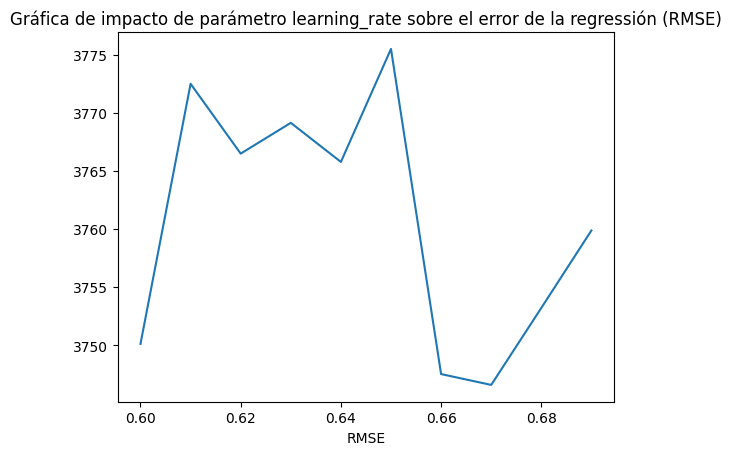

In [56]:
# Lista de valores del parámetro learning_rate_range a probar
learning_rate_range = [0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69]
rmse_scores = []

# Inicialización del modelo de ensamblaje de XGBRegressor usando k-folds cross-validation con k = 10
for parameter in learning_rate_range:
    randomforest2 = XGBRegressor(learning_rate = parameter, random_state = 1, n_jobs = -1)
    randomforest2 = randomforest2.fit(X_train1, y_train1)
    y_pred = randomforest2.predict(X_test1)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test1, y_pred)))

# Graficar impacto de la variable learning_rate con la métrica de RMSE
plt.plot(learning_rate_range, rmse_scores)
plt.title('Gráfica de impacto de parámetro learning_rate sobre el error de la regressión (RMSE)')
plt.xlabel('learning_rate')
plt.xlabel('RMSE')

In [57]:
print(rmse_scores)

[3750.128595930123, 3772.483260076338, 3766.4812889660825, 3769.1267810716727, 3765.7678983643123, 3775.479712514735, 3747.5338634348905, 3746.601128893791, 3753.2164227082953, 3759.8749085644463]


In [78]:
[i for i in list(X1.columns) if i not in list(df_test.columns)]

['Make_Freightliner']

# PRIMER MODELO PARA CREAR MICROSERVICIOS Y PROBAR EN KAGGLE

In [26]:
# Ajustar el nombre de los modelos con el fin de reducir la cantidad de categórias en dicho campo

# Crear copia de los dataframes originales
df_train = dataTraining.copy()
df_test = dataTesting.copy()

# Ajustar la variable Model
df_train['Model'] = df_train['Model'].str[:4].str.upper()
df_test['Model'] = df_test['Model'].str[:4].str.upper()

df_train.shape

(400000, 6)

In [27]:
# Realizar One-hot encoding a las variables string con el fin de que se conviertan en numéricas

### Ajustar las bases originales

df_train = pd.concat([df_train.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_train['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_train['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_train['State'].str.strip(), drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)
df_test = pd.concat([df_test.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_test['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_test['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_test['State'].str.strip(), drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)

df_train.head()

,Price,Year,Mileage,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,34995,2017,9913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,2015,20578,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,2012,83716,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24681,2014,28729,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,2013,64032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Estandarizar la variable Mileage en los sets de entrenamiento y testeo

from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler(with_mean = True)

# Escalonar los valores de la variable Mileage en los sets de entrenamiento y testeo
mileage_scaler_train = scaler.fit_transform(df_train[['Mileage']])
mileage_scaler_test = scaler.transform(df_test[['Mileage']])

# Ajustar el vector escalonado a columna de pandas
mileage_train = pd.DataFrame(mileage_scaler_train).rename(columns = {0:'Mileage'})
mileage_test = pd.DataFrame(mileage_scaler_test).rename(columns = {0:'Mileage'})

# Reemplazar la columna Mileage por la Mileage escalonada 

df_train = pd.concat([df_train.drop(columns='Mileage'), mileage_train], axis = 1)
df_test = pd.concat([df_test.drop(columns='Mileage'), mileage_test], axis = 1)

df_train.head()

,Price,Year,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Mileage
0,34995,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.104669
1,37895,2015,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.843790
2,18430,2012,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.700645
3,24681,2014,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.644406
4,26998,2013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.219149


In [34]:
# Partir la base de Training en training y test

X1 = df_train.drop(columns = 'Price')
y1 = df_train['Price']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
X_train1.shape

(268000, 326)

In [35]:
#Ordenar df_test alfabéticamente por los nombres de las columnas
df_test = df_test.sort_index(axis=1)
X1 = X1.sort_index(axis=1)

#col_names = pd.DataFrame(df_test.columns)
#col_names.to_csv('col_names.csv', index=False)

In [36]:
# Modelo resultante - Primer Modelo Seleccionado
from xgboost import XGBRegressor
X2 = X1.drop(columns = 'Make_Freightliner')
df_test.columns = df_test.columns.str.upper()
X2.columns = X2.columns.str.upper()
XGBRegressor1 = XGBRegressor(learning_rate = 0.66, random_state = 1, n_jobs = -1)
XGBRegressor1 = XGBRegressor1.fit(X2, y1)

prediccion = XGBRegressor1.predict(df_test)

In [27]:
muestra = df_test.sample(n=5, random_state=42)
muestra.to_csv('muestra.csv')

In [39]:
#Guardar y exportar modelo
joblib.dump(XGBRegressor1, 'model/CarPriceRegressor.pkl', compress=3)

['model/CarPriceRegressor.pkl']

In [19]:
prediccion_df = pd.DataFrame(prediccion,index=df_test.index, columns=['Price'])
prediccion_df 

,Price
0,20514.134766
1,37234.500000
2,21045.666016
3,8368.124023
4,30077.640625
...,...
99995,22392.386719
99996,42849.457031
99997,23122.548828
99998,17266.519531


In [82]:

# Guardar predicciones en formato exigido en la competencia de kaggle
prediccion_df.to_csv('test_submission1.csv', index_label='ID')
prediccion_df.head()

,Price
0,20514.134766
1,37234.500000
2,21045.666016
3,8368.124023
4,30077.640625


### Otros intentos prueba 2

Text(0.5, 0, 'RMSE')

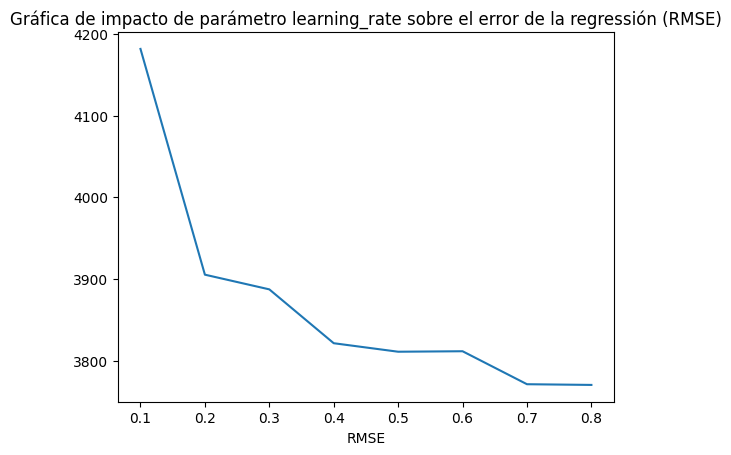

In [58]:
# Lista de valores del parámetro learning_rate_range a probar
colsample_bytree_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
rmse_scores = []

# Inicialización del modelo de ensamblaje de XGBRegressor usando k-folds cross-validation con k = 10
for parameter in colsample_bytree_range:
    randomforest2 = XGBRegressor(learning_rate = 0.67, colsample_bytree = parameter, random_state = 1, n_jobs = -1)
    randomforest2 = randomforest2.fit(X_train1, y_train1)
    y_pred = randomforest2.predict(X_test1)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test1, y_pred)))

# Graficar impacto de la variable learning_rate con la métrica de RMSE
plt.plot(colsample_bytree_range, rmse_scores)
plt.title('Gráfica de impacto de parámetro learning_rate sobre el error de la regressión (RMSE)')
plt.xlabel('learning_rate')
plt.xlabel('RMSE')

In [59]:
print(rmse_scores)

[4181.479554294297, 3905.2851879670116, 3887.307117359101, 3821.4217427705375, 3811.0162570656457, 3811.605843993157, 3771.2600433767293, 3770.401236750433]


Text(0.5, 0, 'RMSE')

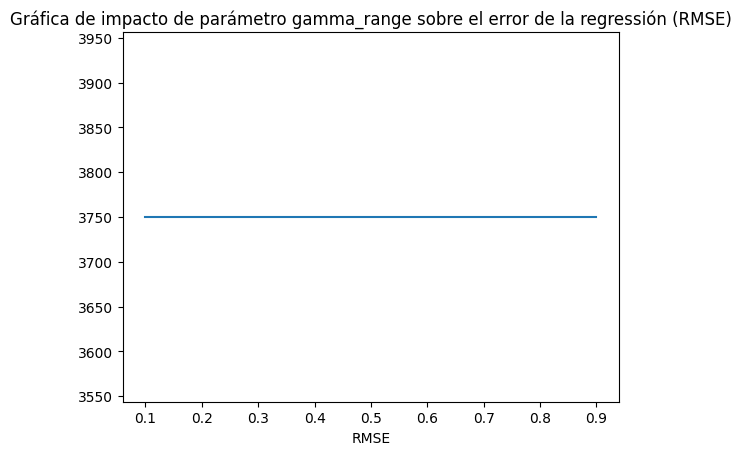

In [55]:
# Lista de valores del parámetro learning_rate_range a probar
gamma_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rmse_scores = []

# Inicialización del modelo de ensamblaje de XGBRegressor usando k-folds cross-validation con k = 10
for parameter in gamma_range:
    randomforest2 = XGBRegressor(learning_rate = 0.6, gamma_range = parameter, random_state = 1, n_jobs = -1)
    randomforest2 = randomforest2.fit(X_train1, y_train1)
    y_pred = randomforest2.predict(X_test1)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test1, y_pred)))

# Graficar impacto de la variable learning_rate con la métrica de RMSE
plt.plot(gamma_range, rmse_scores)
plt.title('Gráfica de impacto de parámetro gamma_range sobre el error de la regressión (RMSE)')
plt.xlabel('gamma_range')
plt.xlabel('RMSE')

# Prueba 3: Pre-procesamiento

In [110]:
# Ajustar el nombre de los modelos con el fin de reducir la cantidad de categórias en dicho campo

# Crear copia de los dataframes originales
df_train = dataTraining.copy()
df_test = dataTesting.copy()

# Ajustar la variable Model
df_train['Model'] = df_train['Model'].str[:4].str.upper()
df_test['Model'] = df_test['Model'].str[:4].str.upper()

df_train.shape

(400000, 6)

In [114]:
df_train = pd.concat([df_train.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_train['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_train['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_train['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)
df_test = pd.concat([df_test.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_test['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_test['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_test['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)

In [115]:
# Eliminación de los outliers de la variable Mileage 

Q25, Q75 = np.percentile(df_train['Mileage'], [25,75])
IQR = Q75-Q25 # Rango Intercuartilico -IQR
df_train = df_train[(df_train['Mileage']>(Q25-1.5*IQR))|(df_train['Mileage']<(Q75+1.5*IQR))]
df_train


,Price,Year,Mileage,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,...,State_ SD,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
0,34995,2017,-1.104669,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,2015,-0.843790,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,2012,0.700645,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24681,2014,-0.644406,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,2013,0.219149,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,29900,2015,-0.728602,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
399996,17688,2015,-0.914752,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
399997,24907,2014,0.284119,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399998,11498,2014,-0.420757,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# Estandarizar la variable Mileage en los sets de entrenamiento y testeo

from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler(with_mean = True)

# Escalonar los valores de la variable Mileage en los sets de entrenamiento y testeo
mileage_scaler_train = scaler.fit_transform(df_train[['Mileage']])
mileage_scaler_test = scaler.transform(df_test[['Mileage']])

# Ajustar el vector escalonado a columna de pandas
mileage_train = pd.DataFrame(mileage_scaler_train).rename(columns = {0:'Mileage'})
mileage_test = pd.DataFrame(mileage_scaler_test).rename(columns = {0:'Mileage'})

# Reemplazar la columna Mileage por la Mileage escalonada 

df_train = pd.concat([df_train.drop(columns='Mileage'), mileage_train], axis = 1)
df_test = pd.concat([df_test.drop(columns='Mileage'), mileage_test], axis = 1)

df_train

,Price,Year,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,...,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,Mileage
0,34995,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.104669
1,37895,2015,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.843790
2,18430,2012,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.700645
3,24681,2014,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.644406
4,26998,2013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.219149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,29900,2015,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-0.728602
399996,17688,2015,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.914752
399997,24907,2014,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.284119
399998,11498,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.420757


In [117]:
# Partir la base de Training en training y test

# df_train.dropna(inplace = True)
X1 = df_train.drop(columns = 'Price')
y1 = df_train['Price']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
X_train1.shape

(268000, 326)

In [118]:
X_train1

,Year,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,...,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,Mileage
398856,2017,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.744331
216459,2014,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-0.298793
294451,2011,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.193587
91169,2012,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.101663
25120,2010,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.123091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.156184
365838,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.551821
131932,2016,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.313837
146867,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.442968


## Primer modelo: XGBoost

Text(0.5, 0, 'RMSE')

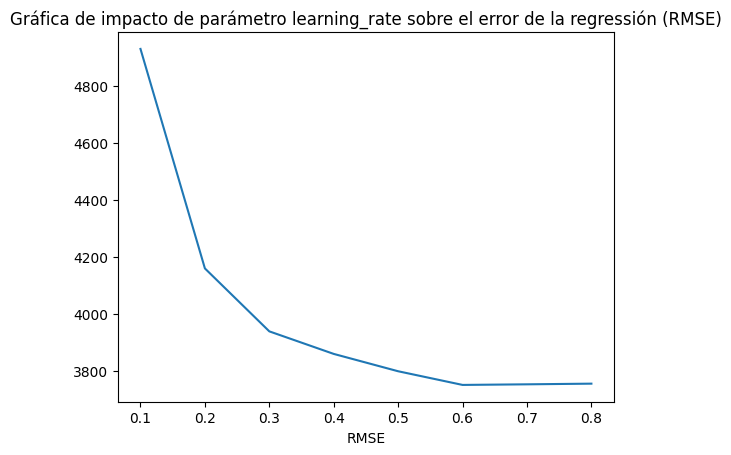

In [119]:
# Lista de valores del parámetro learning_rate_range a probar
learning_rate_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
rmse_scores = []

# Inicialización del modelo de ensamblaje de XGBRegressor usando k-folds cross-validation con k = 10
for parameter in learning_rate_range:
    randomforest2 = XGBRegressor(learning_rate = parameter, random_state = 1, n_jobs = -1)
    randomforest2 = randomforest2.fit(X_train1, y_train1)
    y_pred = randomforest2.predict(X_test1)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test1, y_pred)))

# Graficar impacto de la variable learning_rate con la métrica de RMSE
plt.plot(learning_rate_range, rmse_scores)
plt.title('Gráfica de impacto de parámetro learning_rate sobre el error de la regressión (RMSE)')
plt.xlabel('learning_rate')
plt.xlabel('RMSE')

In [120]:
rmse_scores

[4930.455129739261,
 4159.377473563768,
 3938.272129446232,
 3859.073324476723,
 3798.135940464789,
 3750.128595930123,
 3752.2322714954,
 3754.5858941425417]

# Prueba 4: Pre-procesamiento

In [129]:
# Ajustar el nombre de los modelos con el fin de reducir la cantidad de categórias en dicho campo

# Crear copia de los dataframes originales
df_train = dataTraining.copy()
df_test = dataTesting.copy()

# Ajustar la variable Model
df_train['Model'] = df_train['Model'].str[:5].str.upper()
df_test['Model'] = df_test['Model'].str[:5].str.upper()

df_train.shape

(400000, 6)

In [130]:
df_train = pd.concat([df_train.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_train['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_train['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_train['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)
df_test = pd.concat([df_test.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_test['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_test['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_test['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)

In [131]:
# Eliminación de los outliers de la variable Mileage 

# Q25, Q75 = np.percentile(df_train['Mileage'], [25,75])
# IQR = Q75-Q25 # Rango Intercuartilico -IQR
# df_train = df_train[(df_train['Mileage']>(Q25-1.5*IQR))|(df_train['Mileage']<(Q75+1.5*IQR))]
# df_train


In [132]:
# Estandarizar la variable Mileage en los sets de entrenamiento y testeo

from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler(with_mean = True)

# Escalonar los valores de la variable Mileage en los sets de entrenamiento y testeo
mileage_scaler_train = scaler.fit_transform(df_train[['Mileage']])
mileage_scaler_test = scaler.transform(df_test[['Mileage']])

# Ajustar el vector escalonado a columna de pandas
mileage_train = pd.DataFrame(mileage_scaler_train).rename(columns = {0:'Mileage'})
mileage_test = pd.DataFrame(mileage_scaler_test).rename(columns = {0:'Mileage'})

# Reemplazar la columna Mileage por la Mileage escalonada 

df_train = pd.concat([df_train.drop(columns='Mileage'), mileage_train], axis = 1)
df_test = pd.concat([df_test.drop(columns='Mileage'), mileage_test], axis = 1)

df_train

,Price,Year,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,...,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,Mileage
0,34995,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.104669
1,37895,2015,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.843790
2,18430,2012,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.700645
3,24681,2014,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.644406
4,26998,2013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.219149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,29900,2015,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-0.728602
399996,17688,2015,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.914752
399997,24907,2014,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.284119
399998,11498,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.420757


In [133]:
# Partir la base de Training en training y test

# df_train.dropna(inplace = True)
X1 = df_train.drop(columns = 'Price')
y1 = df_train['Price']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
X_train1.shape

(268000, 354)

In [134]:
X_train1

,Year,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,...,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,Mileage
398856,2017,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.744331
216459,2014,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-0.298793
294451,2011,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.193587
91169,2012,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.101663
25120,2010,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.123091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.156184
365838,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.551821
131932,2016,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.313837
146867,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.442968


## Primer modelo: XGBoost

Text(0.5, 0, 'RMSE')

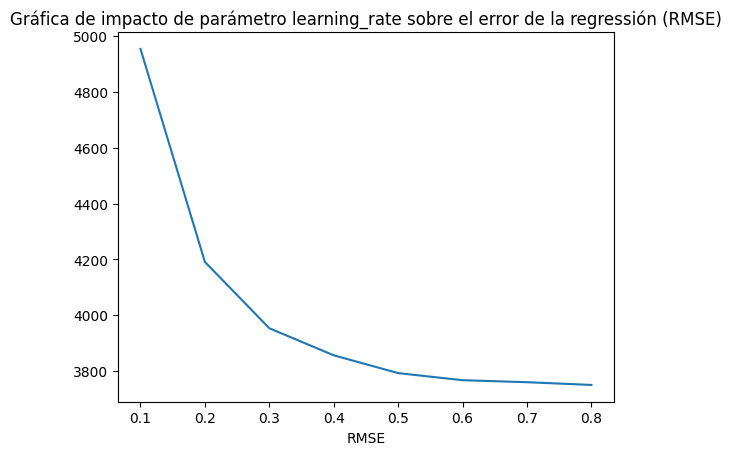

In [135]:
# Lista de valores del parámetro learning_rate_range a probar
learning_rate_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
rmse_scores = []

# Inicialización del modelo de ensamblaje de XGBRegressor usando k-folds cross-validation con k = 10
for parameter in learning_rate_range:
    randomforest2 = XGBRegressor(learning_rate = parameter, random_state = 1, n_jobs = -1)
    randomforest2 = randomforest2.fit(X_train1, y_train1)
    y_pred = randomforest2.predict(X_test1)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test1, y_pred)))

# Graficar impacto de la variable learning_rate con la métrica de RMSE
plt.plot(learning_rate_range, rmse_scores)
plt.title('Gráfica de impacto de parámetro learning_rate sobre el error de la regressión (RMSE)')
plt.xlabel('learning_rate')
plt.xlabel('RMSE')

In [136]:
rmse_scores

[4953.674871047832,
 4191.062883374428,
 3953.5188452643674,
 3856.6112822535783,
 3792.8955703256047,
 3767.522066637826,
 3760.293742555091,
 3750.6022483477727]

# Prueba 5: Pre-procesamiento

In [137]:
# Ajustar el nombre de los modelos con el fin de reducir la cantidad de categórias en dicho campo

# Crear copia de los dataframes originales
df_train = dataTraining.copy()
df_test = dataTesting.copy()

# Ajustar la variable Model
df_train['Model'] = df_train['Model'].str[:5].str.upper()
df_test['Model'] = df_test['Model'].str[:5].str.upper()

df_train.shape

(400000, 6)

In [138]:
df_train = pd.concat([df_train.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_train['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_train['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_train['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)
df_test = pd.concat([df_test.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_test['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_test['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_test['State'], drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)

In [139]:
# Eliminación de los outliers de la variable Mileage 

# Q25, Q75 = np.percentile(df_train['Mileage'], [25,75])
# IQR = Q75-Q25 # Rango Intercuartilico -IQR
# df_train = df_train[(df_train['Mileage']>(Q25-1.5*IQR))|(df_train['Mileage']<(Q75+1.5*IQR))]
# df_train


In [141]:
# # Estandarizar la variable Mileage en los sets de entrenamiento y testeo

# from sklearn.preprocessing import StandardScaler

# # Inicializar el StandardScaler
# scaler = StandardScaler(with_mean = True)

# # Escalonar los valores de la variable Mileage en los sets de entrenamiento y testeo
# mileage_scaler_train = scaler.fit_transform(df_train[['Mileage']])
# mileage_scaler_test = scaler.transform(df_test[['Mileage']])

# # Ajustar el vector escalonado a columna de pandas
# mileage_train = pd.DataFrame(mileage_scaler_train).rename(columns = {0:'Mileage'})
# mileage_test = pd.DataFrame(mileage_scaler_test).rename(columns = {0:'Mileage'})

# # Reemplazar la columna Mileage por la Mileage escalonada 

# df_train = pd.concat([df_train.drop(columns='Mileage'), mileage_train], axis = 1)
# df_test = pd.concat([df_test.drop(columns='Mileage'), mileage_test], axis = 1)

# df_train

In [1]:
# Partir la base de Training en training y test

# df_train.dropna(inplace = True)
X1 = df_train.drop(columns = 'Price')
y1 = df_train['Price']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
X_train1.shape

NameError: name 'df_train' is not defined

In [ ]:
X_train1

,Year,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,...,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,Mileage
398856,2017,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.744331
216459,2014,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-0.298793
294451,2011,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.193587
91169,2012,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.101663
25120,2010,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.123091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.156184
365838,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.551821
131932,2016,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.313837
146867,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.442968


## Primer modelo: XGBoost

Text(0.5, 0, 'RMSE')

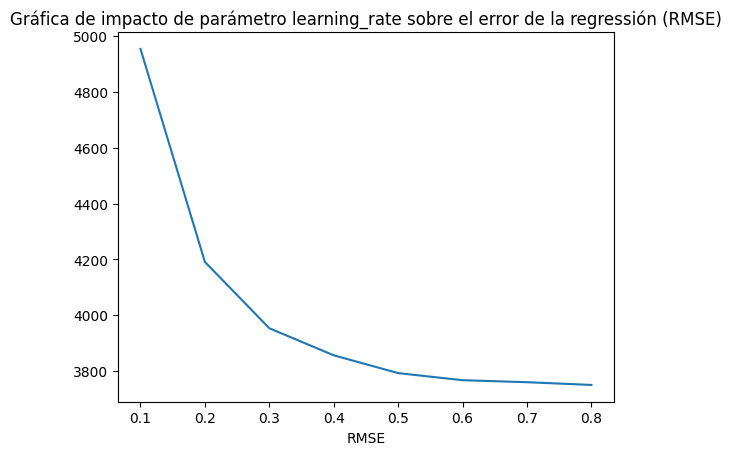

In [ ]:
# Lista de valores del parámetro learning_rate_range a probar
learning_rate_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
rmse_scores = []

# Inicialización del modelo de ensamblaje de XGBRegressor usando k-folds cross-validation con k = 10
for parameter in learning_rate_range:
    randomforest2 = XGBRegressor(learning_rate = parameter, random_state = 1, n_jobs = -1)
    randomforest2 = randomforest2.fit(X_train1, y_train1)
    y_pred = randomforest2.predict(X_test1)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test1, y_pred)))

# Graficar impacto de la variable learning_rate con la métrica de RMSE
plt.plot(learning_rate_range, rmse_scores)
plt.title('Gráfica de impacto de parámetro learning_rate sobre el error de la regressión (RMSE)')
plt.xlabel('learning_rate')
plt.xlabel('RMSE')

In [ ]:
rmse_scores

[4953.674871047832,
 4191.062883374428,
 3953.5188452643674,
 3856.6112822535783,
 3792.8955703256047,
 3767.522066637826,
 3760.293742555091,
 3750.6022483477727]

# Prueba 6: Pre-procesamiento

In [39]:
# Ajustar el nombre de los modelos con el fin de reducir la cantidad de categórias en dicho campo

# Crear copia de los dataframes originales
df_train = dataTraining.copy()
df_test = dataTesting.copy()

# Ajustar la variable Model
df_train['Model'] = df_train['Model'].str.replace('-','').str[:4].str.upper()
df_test['Model'] = df_test['Model'] .str.replace('-','').str[:4].str.upper() #.str[:4].str.upper()

# Ajustar a mayusculas las variables state y make
df_train['Make'] = df_train['Make'].str.upper()
df_train['State'] = df_train['State'].str.upper()
df_test['Make'] = df_test['Make'].str.upper()
df_test['State'] = df_test['State'].str.upper()

df_train.shape
# Realizar One-hot encoding a las variables string con el fin de que se conviertan en numéricas

### Ajustar las bases originales

df_train = pd.concat([df_train.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_train['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_train['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_train['State'].str.strip(), drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)
df_test = pd.concat([df_test.drop(columns = ['Make', 'Model', 'State']), pd.get_dummies(df_test['Make'], drop_first = True, prefix = 'Make').replace({True:1, False:0}), pd.get_dummies(df_test['Model'].str.upper(), drop_first = True, prefix = 'Model').replace({True:1, False:0}), pd.get_dummies(df_test['State'].str.strip(), drop_first = True, prefix = 'State').replace({True:1, False:0})], axis = 1)

df_train.head()

# Estandarizar la variable Mileage en los sets de entrenamiento y testeo

from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler(with_mean = True)

# Escalonar los valores de la variable Mileage en los sets de entrenamiento y testeo
mileage_scaler_train = scaler.fit_transform(df_train[['Mileage']])
mileage_scaler_test = scaler.transform(df_test[['Mileage']])

# Ajustar el vector escalonado a columna de pandas
mileage_train = pd.DataFrame(mileage_scaler_train).rename(columns = {0:'Mileage'})
mileage_test = pd.DataFrame(mileage_scaler_test).rename(columns = {0:'Mileage'})

# Reemplazar la columna Mileage por la Mileage escalonada 

df_train = pd.concat([df_train.drop(columns='Mileage'), mileage_train], axis = 1)
df_test = pd.concat([df_test.drop(columns='Mileage'), mileage_test], axis = 1)

df_train.head()

# Estandarizar la variable Year en los sets de entrenamiento y testeo

from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler(with_mean = True)

# Escalonar los valores de la variable Mileage en los sets de entrenamiento y testeo
year_scaler_train = scaler.fit_transform(df_train[['Year']])
year_scaler_test = scaler.transform(df_test[['Year']])

# Ajustar el vector escalonado a columna de pandas
year_train = pd.DataFrame(year_scaler_train).rename(columns = {0:'Year'})
year_test = pd.DataFrame(year_scaler_test).rename(columns = {0:'Year'})

# Reemplazar la columna Year por Year escalonada 

df_train = pd.concat([df_train.drop(columns='Year'), year_train], axis = 1)
df_test = pd.concat([df_test.drop(columns='Year'), year_test], axis = 1)

df_train.head()

# Partir la base de Training en training y test

X1 = df_train.drop(columns = 'Price')
y1 = df_train['Price']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
X_train1.shape
# Modelo resultante - Primer Modelo Seleccionado

X2 = X1 #.drop(columns = 'Make_FREIGHTLINER')

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

XGBRegressor1 = XGBRegressor(learning_rate = 0.66, random_state = 1, n_jobs = -1)
XGBRegressor1 = XGBRegressor1.fit(X2, y1)
prediccion = XGBRegressor1.predict(X_test1)
print('RMSE: ', np.sqrt(mean_squared_error(y_test1, prediccion)))

RMSE:  3625.957282108555


In [41]:
# Modelo resultante - Primer Modelo Seleccionado

X2 = X1.drop(columns = 'Make_FREIGHTLINER')
XGBRegressor1 = XGBRegressor(learning_rate = 0.66, random_state = 1, n_jobs = -1)
XGBRegressor1 = XGBRegressor1.fit(X2, y1)
prediccion = XGBRegressor1.predict(df_test)

In [42]:
prediccion_df = pd.DataFrame(prediccion,index=df_test.index, columns=['Price'])
prediccion_df 

# Guardar predicciones en formato exigido en la competencia de kaggle
prediccion_df.to_csv('test_submission2.csv', index_label='ID')
prediccion_df.head()

,Price
0,20801.181641
1,37169.578125
2,21616.916016
3,7809.334961
4,31571.978516
